# PASS Session Week 6 (Divergence Theorem)

<img src="Week_6_DT.jpeg" width="600" alt="DT Question"/>

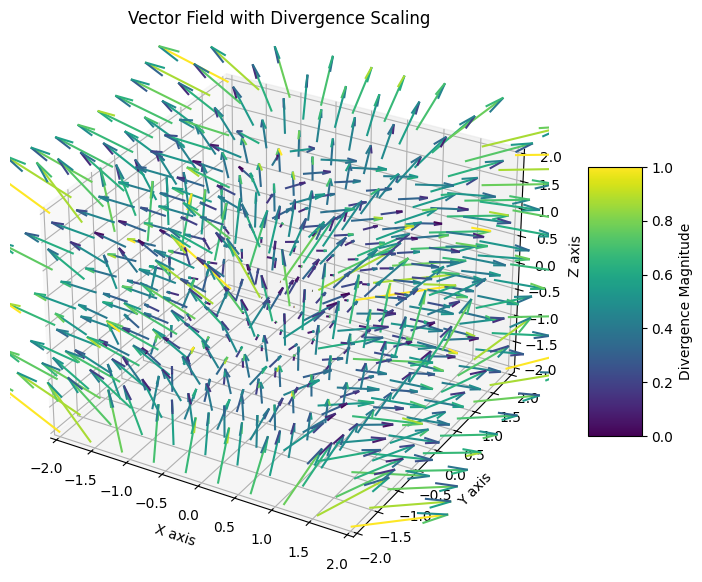

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the vector field
def vector_field(x, y, z):
    Gx = 4*x**3 + y + np.exp(y) * np.cos(z)
    Gy = x + 2*y**2
    Gz = 3*z**2 - np.exp(y) * np.sin(z)
    return Gx, Gy, Gz

# Define the divergence of the vector field
def divergence(x, y, z):
    r_squared = x**2 + y**2 + z**2
    return r_squared

# Create a denser grid of points
x_dense, y_dense, z_dense = np.meshgrid(np.linspace(-2, 2, 10), 
                                        np.linspace(-2, 2, 10), 
                                        np.linspace(-2, 2, 5))

# Calculate the divergence at each point
divergence_magnitude = divergence(x_dense, y_dense, z_dense)

# Calculate the vector field at each point on the denser grid
Gx_dense, Gy_dense, Gz_dense = vector_field(x_dense, y_dense, z_dense)

# Normalise the vectors for better visualisation
G_magnitude = np.sqrt(Gx_dense**2 + Gy_dense**2 + Gz_dense**2)
Gx_dense /= G_magnitude
Gy_dense /= G_magnitude
Gz_dense /= G_magnitude

# Scale by divergence magnitude (r^2)
Gx_dense *= divergence_magnitude
Gy_dense *= divergence_magnitude
Gz_dense *= divergence_magnitude

# Set up the figure and 3D axis for the denser vector field
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the vector field
color = divergence_magnitude.flatten()
quiver = ax.quiver(x_dense, y_dense, z_dense, Gx_dense, Gy_dense, Gz_dense, 
                   length=0.1, 
                   colors=plt.cm.viridis(color / color.max()))

# Create a colorbar
cbar = fig.colorbar(quiver, shrink=0.5, aspect=5)
cbar.set_label('Divergence Magnitude')

# Set labels
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Vector Field with Divergence Scaling')

# Show the plot
plt.show()


The vectors are longer in regions of higher divergence (further from the origin), which aligns with the mathematical definition of divergence. The colour gradient from blue to yellow indicates increasing magnitude of divergence, with yellow representing higher values.

# PASS Session Week 7 (Computing)

### Experiment X

In [1]:
from sympy import symbols, diff
import math

# Define constants
atomic_weights = {'Na': 22.9898, 'Cl': 35.453, 'Si': 28.0855}
unit_mass = 1.6605E-27  # Atomic mass unit in kg
lattice_constants = {'a': 5.64E-10, 'b': 5.43E-10}  # Lattice constants for NaCl and Si in meters
errors = {'Na': 0.00005, 'Cl': 0.0005, 'Si': 0.00005, 'u': 0.00005E-27, 'a': 0.014E-10, 'b': 0.007E-10}

# Define symbols
Si, Na, Cl, u, a, b = symbols('Si Na Cl u a b')

# Function to calculate density
def calculate_density(formula, lattice_constant):
    return (formula * u) / lattice_constant**3

# Function to substitute values and calculate partial derivatives
def evaluate_derivative(expr, var):
    return diff(expr, var).subs({Na: atomic_weights['Na'], Cl: atomic_weights['Cl'], Si: atomic_weights['Si'], u: unit_mass, a: lattice_constants['a'], b: lattice_constants['b']})

# Function to calculate error using error propagation
def calculate_error(formula, variables):
    return math.sqrt(sum((evaluate_derivative(formula, var) * errors[str(var)])**2 for var in variables)) / 10**3

# Density formulas
NaCl_density = calculate_density(4 * (Na + Cl), a)
Si_density = calculate_density(8 * Si, b)

# Calculate errors
NaCl_error = calculate_error(NaCl_density, [Na, Cl, u, a])
Si_error = calculate_error(Si_density, [Si, u, b])

# Output the calculated errors
print("Error in NaCl density:", NaCl_error)
print("Error in Silicon density:", Si_error)

Error in NaCl density: 0.016112636160865678
Error in Silicon density: 0.009012477895149015


In [3]:
import subprocess

# Path to the PDF file
feedback = 'Experiment_X_result.pdf'

# Open the PDF with the default PDF reader
subprocess.call(['open', feedback])

0

### Experiment L

In [15]:
from sympy import symbols, diff, sqrt

# Define symbols for the variables in both equations
L, I1, I2, V, m, I, gr, gb = symbols('L I1 I2 V m I gr gb')

# Equation for 'c'
c_expr = L * (I1 - I2 + (0.8084 * V)) / (m * 221.15)
# Values and their respective errors for each variable in the first calculation
values1 = {'L': 210, 'I1': 278.1, 'I2': 272.41, 'V': 2.4, 'm': 8.29}
error_values1 = {'L': 1, 'I1': 0.01, 'I2': 0.007, 'V': 0.5, 'm': 0.005}

# Equation for 'L'
L_expr = V * I / (gr - gb)
# Values and their respective errors for each variable in the second calculation
values2 = {'V': 10.9, 'I': 1.11, 'gr': 0.06475, 'gb': 0.00678}
error_values2 = {'V': 0.05, 'I': 0.01, 'gr': 0.000005, 'gb': 2E-6}

# Function to calculate the error for a given expression and error values
def calculate_error(expression, values, error_values):
    error_sum = 0
    # Only consider the symbols that are in the expression and have an error value
    for var in expression.free_symbols:
        if str(var) in error_values:
            derivative = diff(expression, var).subs(values)
            error_sum += (derivative * error_values[str(var)])**2
    return sqrt(error_sum)

# Calculate the errors for 'c' and 'L'
c_error = calculate_error(c_expr, values1, error_values1).evalf()
L_error = calculate_error(L_expr, values2, error_values2).evalf()

# Print the results
print(f"Combined Error for 'c': {c_error.evalf()}")
print(f"Combined Error for 'L': {L_error.evalf()}")

Combined Error for 'c': 0.0465099621066502
Combined Error for 'L': 2.11008025530947


# PASS Session Week 9 (Quantum Mechanics)

The appearance of the imaginary unit $i$ and the reduced Planck constant $\hbar$ (pronounced "h-bar") throughout quantum mechanics is due to the fundamental nature of the theory.

The imaginary unit $i$ is crucial because it allows the mathematical representation of quantum states to include phase information, which is essential for describing interference effects. In quantum mechanics, the state of a system is described by a wave function, and these wave functions can add together (superpose) to produce interference patterns. The use of complex numbers (which include the imaginary unit $i$) is what allows these wave functions to interfere constructively and destructively, just as waves do in classical physics. Without $i$, we would lose this ability to accurately describe the behaviour of quantum systems.

The reduced Planck constant $\hbar$ is a fundamental physical constant that relates the energy of a photon to its frequency: $E = \hbar \omega$, where $\omega$ is the angular frequency. In the context of the Schrödinger equation, $\hbar$ appears as a scale factor that determines how the wave function evolves over time. It essentially sets the scale for quantum effects; its value is such that quantum effects are significant at the atomic scale but become negligible at the macroscopic scale. The inclusion of $\hbar$ in quantum equations is a reflection of its role as the fundamental scale of action in quantum mechanics.

Together, $i$ and $\hbar$ feature in the Schrödinger equation, $i\hbar \frac{\partial}{\partial t}\Psi = \hat{H}\Psi$, which describes how the quantum state (represented by the wave function $\Psi$) evolves over time under the influence of the Hamiltonian operator $\hat{H}$. The presence of $i\hbar$ ensures that the conservation of probability (normalisation of the wave function) holds as the system evolves, which is a key requirement for any physical theory.

<img src="Week_9_QM.jpeg" width="600" alt="QM Question"/>

## Solution to Quantum Mechanics Questions

### a) Definitions

1. **Wave function** ($\psi$): 
   A mathematical description of the quantum state of a system. The absolute square of the wave function, $|\psi(x)|^2$, represents the probability density of finding a particle at position x.

2. **Expectation value of an observable** ($\langle O \rangle$): 
   The expected value of a measurement of an observable $O$ over many trials, given a particular quantum state. For a wave function $\psi$, it is computed as $\langle \psi|O|\psi \rangle$.

3. **Stationary state**: 
   A quantum state with all observables independent of time. The system's wave function $\psi(x,t)$ can be separated into a spatial part and a time part, where the time part has a simple harmonic time dependence of the form $e^{-iEt/\hbar}$, with $E$ being the energy of the system. The probability density for such states does not change over time, as $|\psi(x,t)|^2 = |\psi(x)|^2$.

### b) Sketching the real part of the wave function

For a free particle, immediately after:
- a position measurement, the wave function collapses to a delta function at the position measured.
- a momentum measurement, the wave function becomes a complex exponential of the form $e^{ipx/\hbar}$, where $p$ is the momentum. The real part of this function is $\cos(px/\hbar)$.


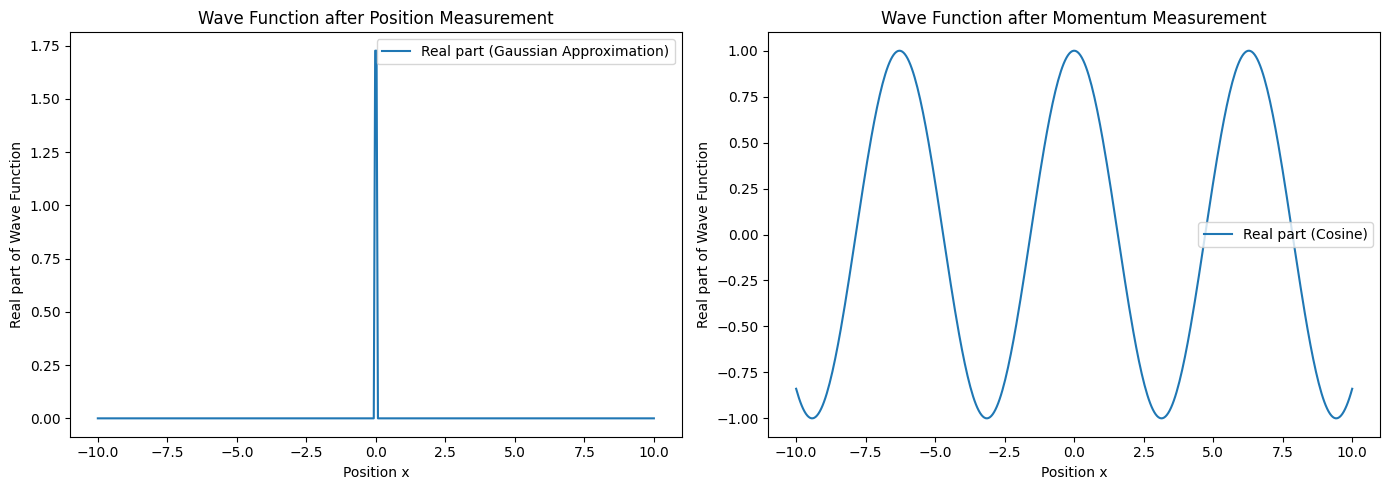

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the momentum and position
momentum_p = 1.0 # arbitrary value for demonstration
hbar = 1.0 # using natural units for simplicity

# Define the position space and momentum space
x = np.linspace(-10, 10, 400)

# Wave function after a position measurement: delta function (not possible to represent accurately in continuous space)
# We'll represent it as a Gaussian with a very small width
position_wavefunction = np.exp(-(x-0)**2 / (2*0.01**2))
position_wavefunction /= np.sqrt(2*np.pi*0.01**2)  # Normalise the Gaussian

# Wave function after a momentum measurement: cos(px/hbar)
momentum_wavefunction = np.cos(momentum_p * x / hbar)

# Plot the real parts of the wave functions
plt.figure(figsize=(14, 5))

# Plot for position measurement
plt.subplot(1, 2, 1)
plt.plot(x, position_wavefunction, label='Real part (Gaussian Approximation)')
plt.title('Wave Function after Position Measurement')
plt.xlabel('Position x')
plt.ylabel('Real part of Wave Function')
plt.legend()

# Plot for momentum measurement
plt.subplot(1, 2, 2)
plt.plot(x, momentum_wavefunction, label='Real part (Cosine)')
plt.title('Wave Function after Momentum Measurement')
plt.xlabel('Position x')
plt.ylabel('Real part of Wave Function')
plt.legend()

plt.tight_layout()
plt.show()

### Fourier Transform Relationship in Quantum Mechanics

In quantum mechanics, the wave functions in position space $\psi(x)$ and momentum space $\phi(p)$ are Fourier transforms of each other. This is a reflection of the Heisenberg Uncertainty Principle, which implies that the exact position and momentum of a particle cannot be known simultaneously.

- **Position Measurement**: After a position measurement, the wave function collapses to a delta function $\delta(x - x_0)$ at the measured position $x_0$. The Fourier transform of a delta function in position space is a complex exponential in momentum space, indicating an equal superposition of all possible momenta:

  $$
  \psi(x) \rightarrow \delta(x - x_0)
  $$

- **Momentum Measurement**: After a momentum measurement, the wave function collapses to a complex exponential of the form $e^{ipx/\hbar}$, representing a state of definite momentum $p$. The Fourier transform of a complex exponential in momentum space is a delta function in position space:

  $$
  \phi(p) \rightarrow e^{ipx/\hbar}
  $$

  The real part of this wave function in position space is given by $\cos(px/\hbar)$, reflecting the oscillatory nature of the wave function after a precise momentum measurement.

These transformations underline the wave-particle duality of quantum entities, where the wave function's behaviour changes drastically depending on whether position or momentum is measured.

### c) Phase of the wave function

To show that the phase of the wave function cannot be measured, consider the wave function in polar form $R(x)e^{i\theta(x)}$, where $R(x)$ is the amplitude and $\theta(x)$ is the phase. The probability density is $|\psi(x)|^2 = R(x)^2$, which is independent of the phase $\theta(x)$. Multiplying the wave function by a phase factor $e^{i\theta_0}$, the new wave function $\psi' = \psi e^{i\theta_0} = R(x)e^{i(\theta(x)+\theta_0)}$ has the same probability density $|\psi'(x)|^2 = R(x)^2$. Since the probabilities are unchanged by this phase factor, the phase itself cannot be measured. However...

### Superposition and Interference in Quantum States

Given a wave function $\psi$ that is a superposition of two states $\phi_1$ and $\phi_2$ with coefficients $c_1$ and $c_2$:

$$
\psi = c_1 \phi_1 + c_2 \phi_2
$$

The probability density $|\psi|^2$ becomes:

$$
|\psi|^2 = |c_1 \phi_1|^2 + |c_2 \phi_2|^2 + c_1^* c_2 \phi_1^* \phi_2 + c_1 c_2^* \phi_1 \phi_2^*
$$

Where:

- $|c_1 \phi_1|^2$ and $|c_2 \phi_2|^2$ are the individual probability densities.
- $c_1^* c_2 \phi_1^* \phi_2$ and $c_1 c_2^* \phi_1 \phi_2^*$ represent the interference terms.

These interference terms are essential for understanding the non-classical behaviours in quantum systems, such as constructive and destructive interference patterns.

# PASS Session Week 11 (Quantum Mechanics)

<img src="Week_11_QM.jpeg" width="600" alt="QM Question"/>

# Stirling's Approximation

In [19]:
import math
from numba import njit
import matplotlib.pyplot as plt

@njit
def log_factorial(n):
    """Calculate the logarithm of the factorial of a number"""
    log_fact = 0.0
    for i in range(1, n + 1):
        log_fact += math.log(i)
    return log_fact

@njit
def log_n_pow_n_times_e_pow_minus_n(n):
    """Calculate the logarithm of N^N * e^(-N)"""
    return n * math.log(n) - n

@njit
def comparison_details_log(n, threshold=0.01):
    """Compare log(N!) with log(N^N * e^(-N)) and return the closeness and the difference"""
    log_factorial_n = log_factorial(n)
    log_calculation = log_n_pow_n_times_e_pow_minus_n(n)
    difference = abs(log_factorial_n - log_calculation)
    is_close = difference <= threshold * n
    return is_close, difference


In [ ]:
# Data collection
n_values = []
differences = []
max_n = 1e10
n = 1
while n <= max_n:
    is_close, diff = comparison_details_log(n)
    print(f"For N = {n}, log(N!) and log(N^N * e^(-N)) are {'close' if is_close else 'not close'}, Log Difference: {diff}")
    n_values.append(n)
    differences.append(diff)
    n *= 10

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, differences, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Log Difference')
plt.title('Log Difference between log(N!) and log(N^N * e^(-N))')
plt.grid(True)
plt.show()

# PASS Session Week 13 (Projects)

In [1]:
import subprocess

third_year = '3MSciLabHB_2022.pdf'
subprocess.call(['open', third_year])

0

In [2]:
fourth_year = 'ProjectProposalsMsci2023(1).pdf'
subprocess.call(['open', fourth_year])

0